## **Data Collection**



**Loading Data**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/advertising.csv')

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## **DATA PREPROCESSING**



**Data Cleaning**

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

**Outlier Detection and Removal**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def boxplot(str,column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column} {str}')
    plt.show()

Before Outlier Removing:  TV


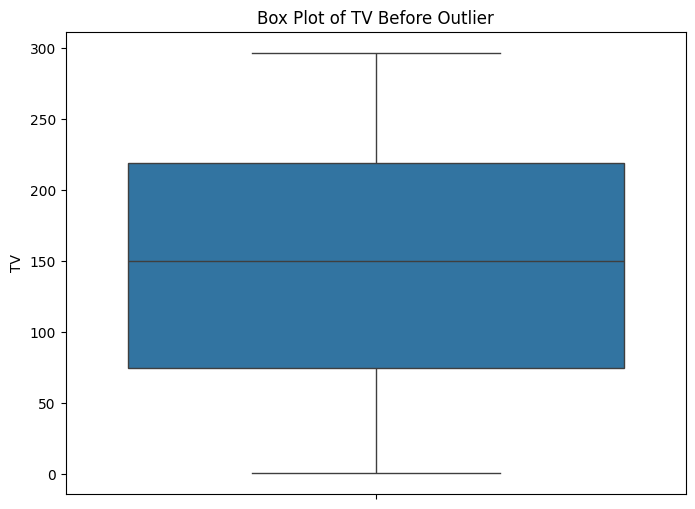

After Outlier Removing:  TV


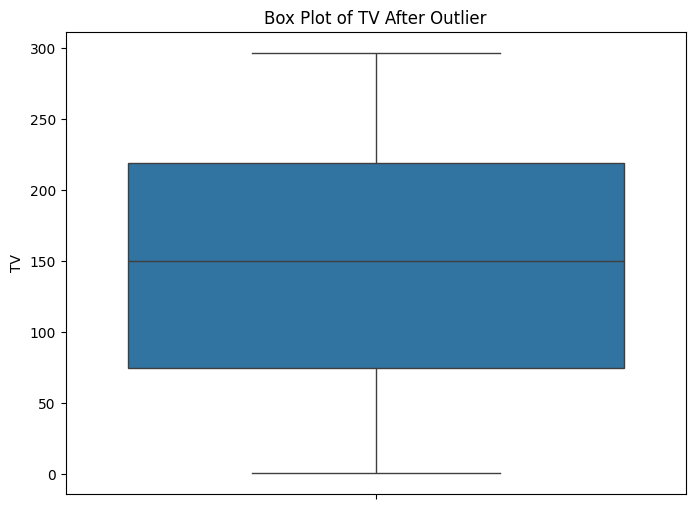

Before Outlier Removing:  Radio


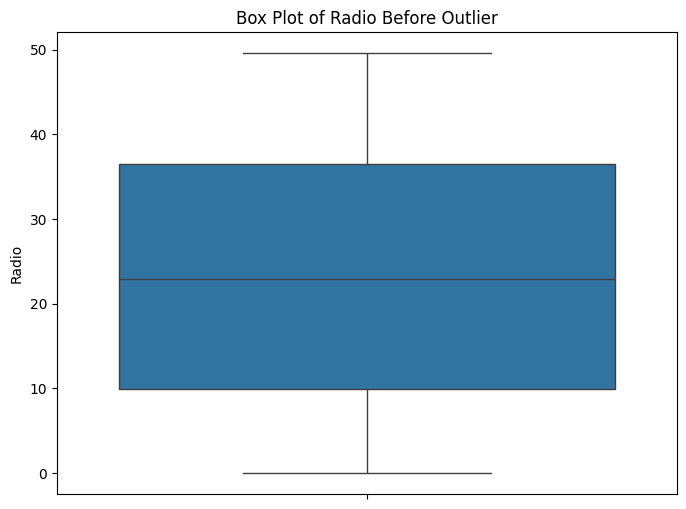

After Outlier Removing:  Radio


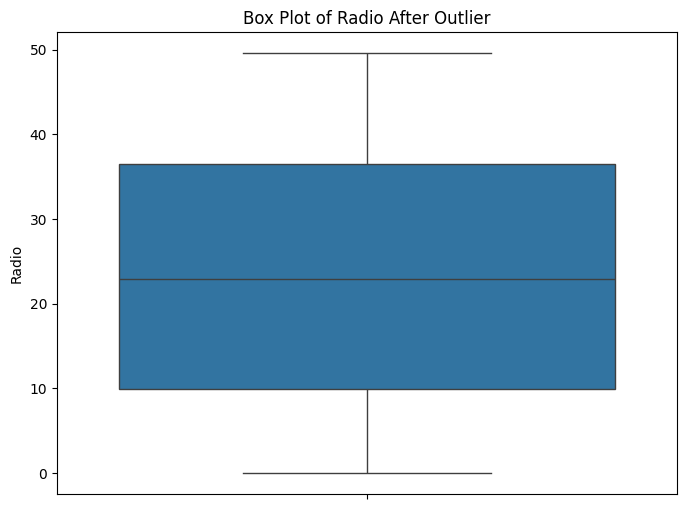

Before Outlier Removing:  Newspaper


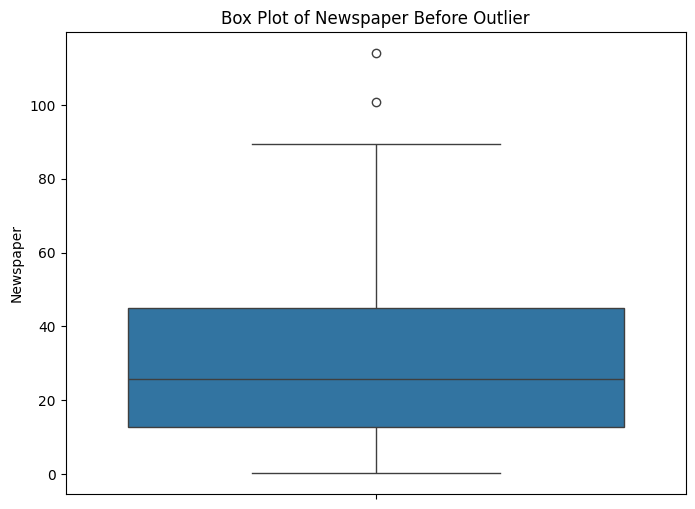

After Outlier Removing:  Newspaper


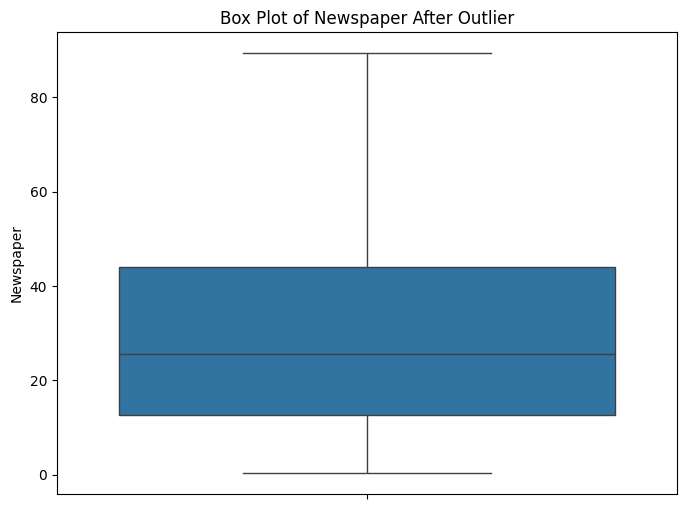

Before Outlier Removing:  Sales


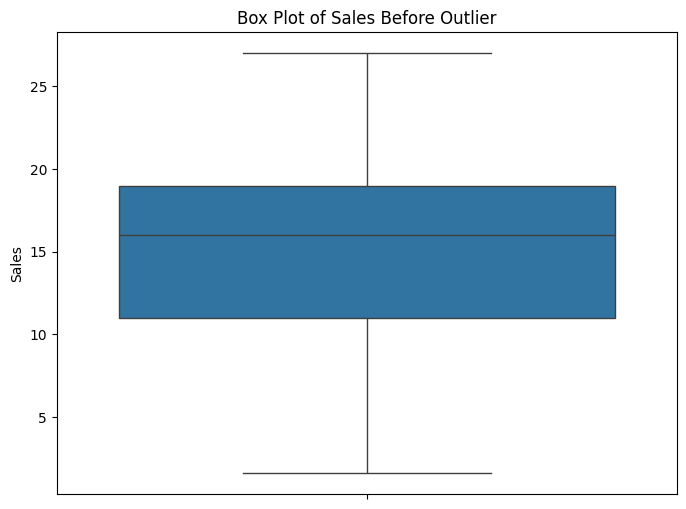

After Outlier Removing:  Sales


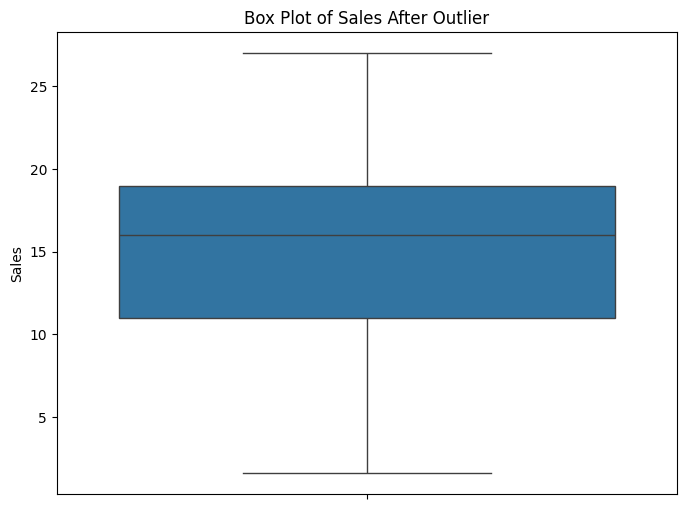

In [ ]:
for column in data:

    print("Before Outlier Removing: ",column)

    boxplot('Before Outlier',column)

    print("After Outlier Removing: ",column)

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    data = data.loc[(data[column] > lower_bound) & (data[column] < upper_bound)]

    boxplot('After Outlier',column)



In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


## **DATA VISUALIZATION**

**Sales Vs  TV**


Text(0, 0.5, 'Sales')

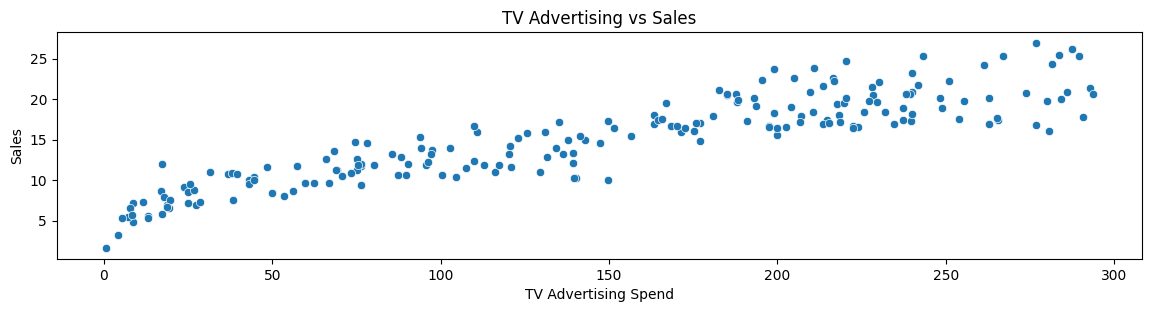

In [ ]:
# Plot TV vs Sales
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
sns.scatterplot(data=data, x='TV', y='Sales')
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')

**Radio vs Sales**


Text(0, 0.5, 'Sales')

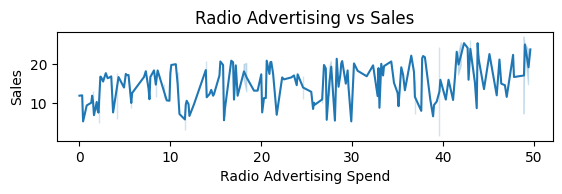

In [ ]:
# Plot Radio vs Sales
plt.subplot(3, 1, 2)
sns.lineplot(data=data, x='Radio', y='Sales')
plt.title('Radio Advertising vs Sales')
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Sales')

**Newspaper vs Sales**

Text(0, 0.5, 'Sales')

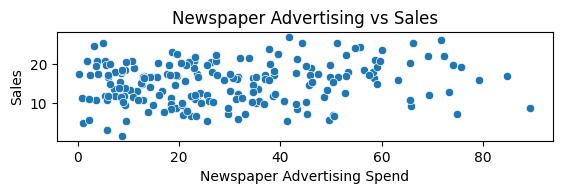

In [24]:
# Plot Newspaper vs Sales
plt.subplot(3, 1, 3)
sns.scatterplot(data=data, x='Newspaper', y='Sales')
plt.title('Newspaper Advertising vs Sales')
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Sales')

**Correlation Matrix**

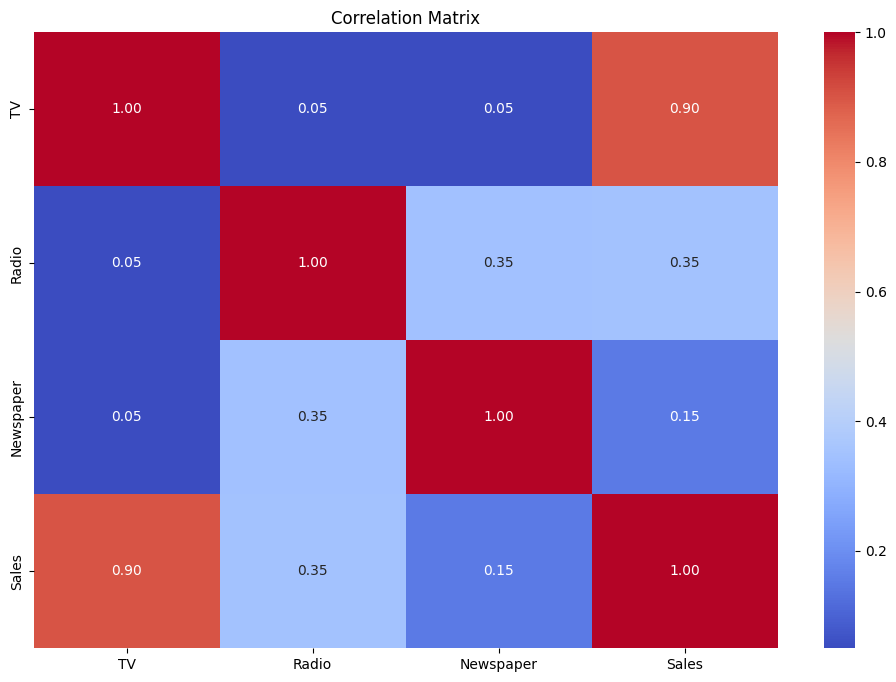

In [25]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## **FEATURE ENGINEERING**

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scalerx = StandardScaler()
scalery = StandardScaler()

### **MODEL SELECTION**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,precision_recall_curve, roc_curve, roc_auc_score,auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [38]:
# Prepare the data for modeling
X = data.drop(['Sales'], axis=1)
y = data['Sales']

**Standard Scaler**

In [39]:
X = scalerx.fit_transform(X)

In [40]:

# Convert the y to a NumPy array
y_array = y.values

# Reshape the NumPy array to a 2D array with one column
y_reshaped = y_array.reshape(-1, 1)

# Use the reshaped array for fitting and transforming
y = scalery.fit_transform(y_reshaped)


In [41]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [42]:
X

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

In [43]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Linear Regression**

In [44]:
# Initialize the models
linear_model = LinearRegression()

# Train the models
linear_model.fit(X_train, y_train)

# Make predictions
y_linear_pred = linear_model.predict(X_test)


In [45]:
y_linear_pred

array([[-1.19348717],
       [-0.25284932],
       [ 1.73546349],
       [-0.76065887],
       [-1.09928988],
       [ 1.21428971],
       [ 0.96208426],
       [-0.44472972],
       [ 0.0054811 ],
       [ 1.13789225],
       [ 0.16914668],
       [ 1.00437958],
       [-1.31891122],
       [-0.20228269],
       [-1.17204794],
       [-0.83103339],
       [-1.09321825],
       [ 0.1380302 ],
       [-1.008827  ],
       [-0.65840302],
       [-0.47449   ],
       [ 0.40295172],
       [ 1.58718056],
       [-1.53488426],
       [ 0.68876353],
       [ 1.11448294],
       [-1.31106412],
       [ 0.5998629 ],
       [-1.45433543],
       [-0.04595048],
       [ 0.69364942],
       [-0.18814119],
       [-1.15637529],
       [-0.38502569],
       [ 0.80047591],
       [ 0.53132353],
       [ 0.33975899],
       [-0.1096934 ],
       [ 0.85688504],
       [ 0.5032013 ]])

In [46]:
# Evaluate the models
mse_lr = mean_squared_error(y_test, y_linear_pred)

r2_lr = r2_score(y_test, y_linear_pred)

# Display the results
print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

Linear Regression - MSE: 0.08738377761878846, R2: 0.9130003152798273


**Residual Plot**

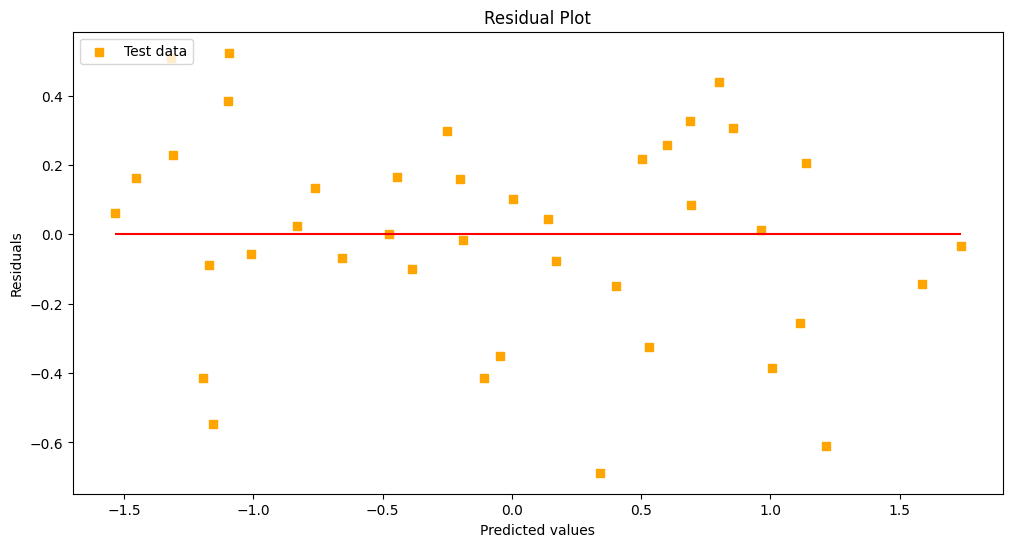

In [47]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_linear_pred, y_linear_pred - y_test, c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_linear_pred.min(), xmax=y_linear_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

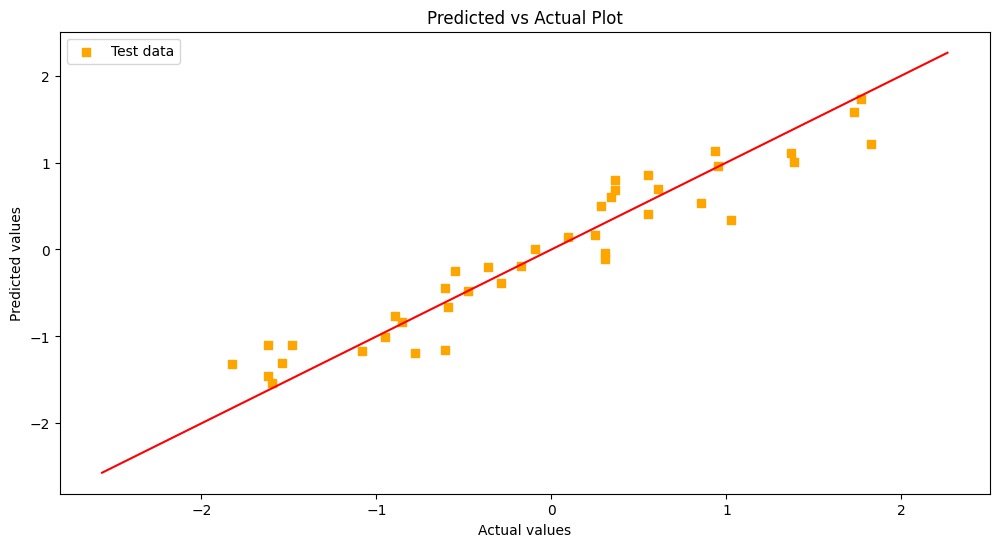

In [48]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_linear_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

# **Decision Tree Regressor**

In [49]:
decision_model = DecisionTreeRegressor()

decision_model.fit(X_train, y_train)

y_decision_pred = decision_model.predict(X_test)

In [50]:
y_decision_pred

array([-1.25526449, -0.3233257 ,  1.35036028, -0.77978551, -1.86387757,
        1.65466682,  0.85586215, -0.51351729, -0.91291963,  1.10311121,
        0.38038318,  1.63564766, -1.86387757, -0.4184215 , -0.60861308,
       -0.4184215 , -1.86387757,  0.24724907, -1.27428364, -0.34234486,
       -0.34234486,  0.17117243,  1.95897336, -1.42643692,  0.43744065,
        1.25526449, -1.42643692,  0.4184215 , -1.42643692,  0.53253645,
        0.62763224, -0.01901916, -0.60861308, -0.09509579,  0.49449813,
        1.0650729 ,  1.04605374,  0.53253645,  0.72272804,  0.28528738])

In [51]:
y_decision_pred= y_decision_pred.reshape(-1,1)

In [52]:
mse_dt = mean_squared_error(y_test, y_decision_pred)

r2_dt = r2_score(y_test, y_decision_pred)


print(f'Decision Tree - MSE: {mse_dt}, R2: {r2_dt}')

Decision Tree - MSE: 0.06700114364636846, R2: 0.9332933579668025


**Residual PLot**

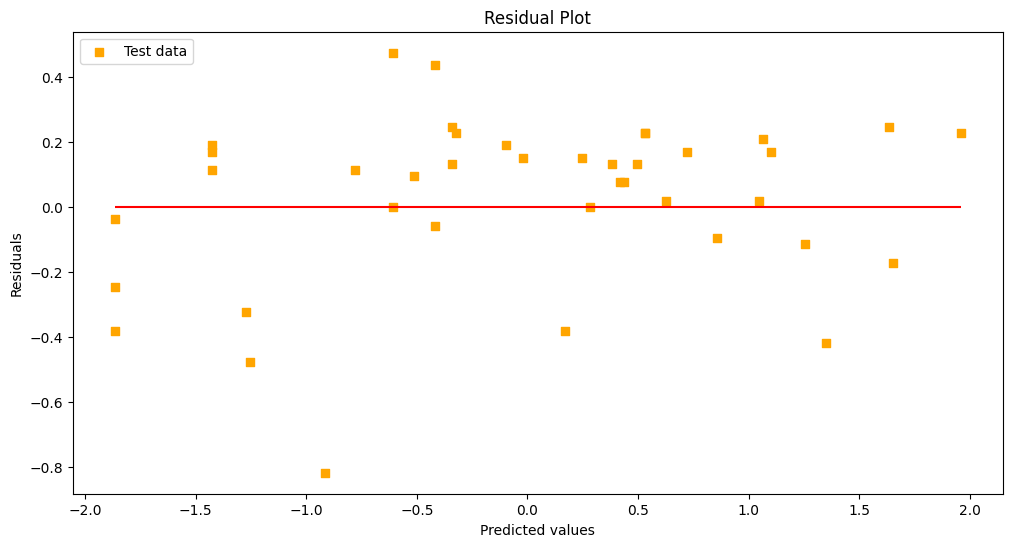

In [53]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_decision_pred,(y_decision_pred - y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_decision_pred.min(), xmax=y_decision_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

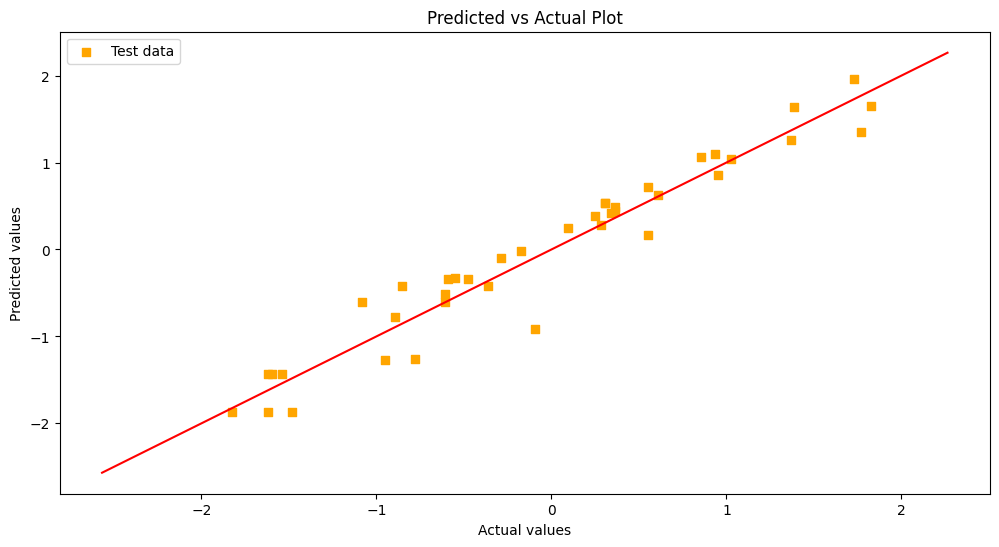

In [55]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_decision_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

# **Random Forest Regressor**

In [56]:
random_model = RandomForestRegressor()

random_model.fit(X_train, y_train)

y_random_pred = random_model.predict(X_test)

<ipython-input-56-bf93474fa3dc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_model.fit(X_train, y_train)


In [57]:
y_random_pred

array([-1.22635536, -0.53272664,  1.45534604, -0.5743786 , -1.72427694,
        1.5669885 ,  0.79747333, -0.50667039, -0.18144278,  0.77921494,
        0.35584846,  1.50936045, -1.7975007 , -0.35166425, -0.58826258,
       -0.64284757, -1.74862147,  0.29289505, -1.06031811, -0.47224571,
       -0.25143328,  0.38799084,  1.92435849, -1.48615707,  0.55231637,
        1.33837821, -1.38041055,  0.44790119, -1.45762834,  0.20787941,
        0.64341814, -0.12533626, -0.55003407, -0.34082333,  0.45588924,
        1.0401578 ,  0.895422  ,  0.19342485,  0.65045523,  0.52397783])

In [58]:
y_random_pred = y_random_pred.reshape(-1,1)

In [59]:
mse_rf = mean_squared_error(y_test, y_random_pred)

r2_rf = r2_score(y_test, y_random_pred)

print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')

Random Forest - MSE: 0.03438487387919, R2: 0.9657662638518246


**Residual Plot**

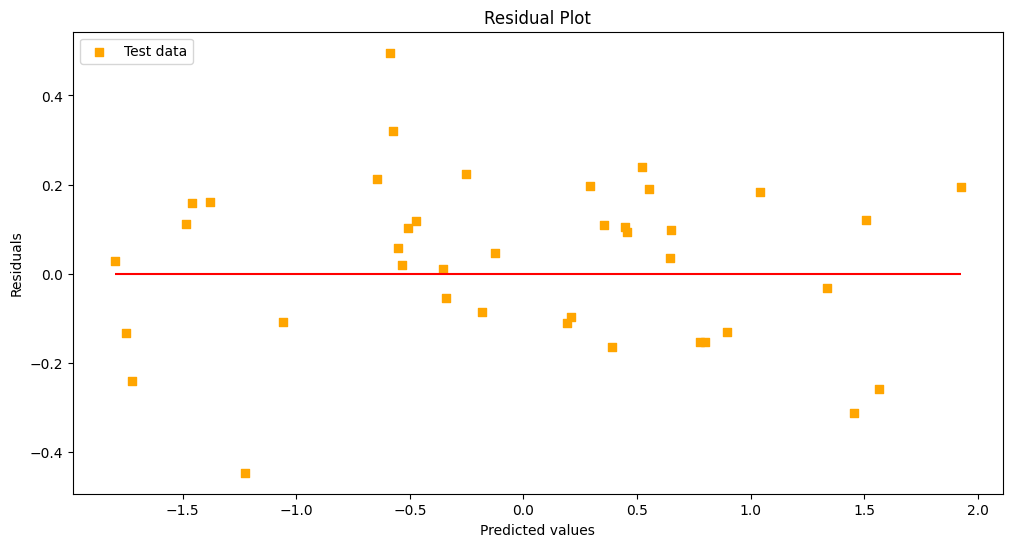

In [60]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_random_pred,(y_random_pred - y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_random_pred.min(), xmax=y_random_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

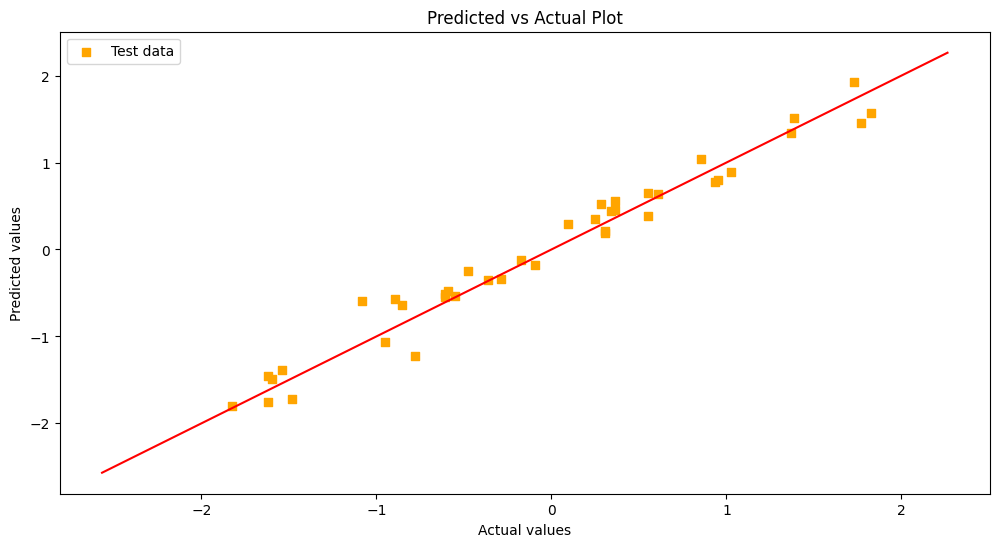

In [61]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_random_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

# **Support Vector Regression (SVR)**

In [64]:
svr = SVR(kernel='linear')

svr.fit(X_train, y_train)

y_svr_pred = svr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
y_svr_pred

array([-1.16291753, -0.25261173,  1.75546658, -0.77280769, -1.05840366,
        1.26627992,  0.98160112, -0.4406263 ,  0.02130483,  1.12489895,
        0.17122255,  1.04466875, -1.29025068, -0.19214674, -1.18470894,
       -0.83580657, -1.05022025,  0.11631246, -0.98188231, -0.63039808,
       -0.4435873 ,  0.43997892,  1.61387567, -1.52744132,  0.70156664,
        1.15325352, -1.2953115 ,  0.56139375, -1.44070975, -0.06054393,
        0.71077578, -0.16186501, -1.1692522 , -0.33494128,  0.77527494,
        0.5769502 ,  0.34730995, -0.1198981 ,  0.86446774,  0.51506883])

In [66]:
y_svr_pred = y_svr_pred.reshape(-1,1)

In [67]:
mse_svr = mean_squared_error(y_test, y_svr_pred)

r2_svr = r2_score(y_test, y_random_pred)

print(f'Random Forest - MSE: {mse_svr}, R2: {r2_svr}')

Random Forest - MSE: 0.08585942941860104, R2: 0.9657662638518246


**Residual Plot**

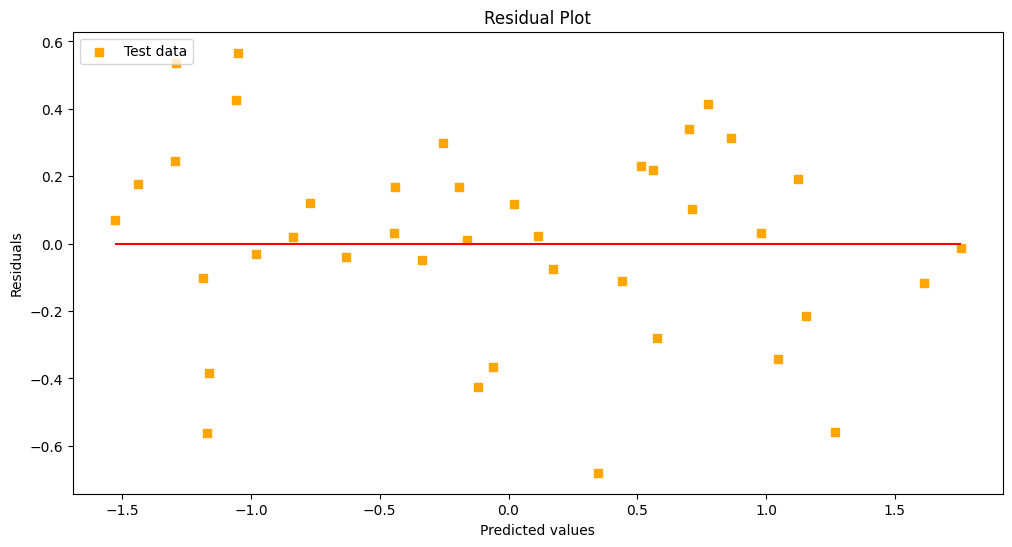

In [68]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_svr_pred,(y_svr_pred - y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_svr_pred.min(), xmax=y_svr_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

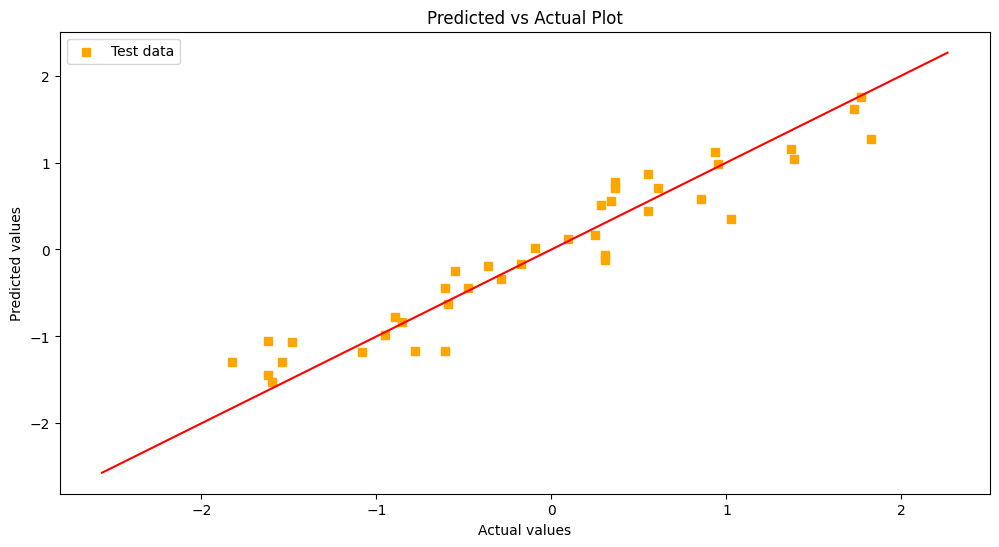

In [69]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_svr_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

# **LSTM**

In [70]:
# Split the data into training and testing sets
scaler = StandardScaler()
scaled_data=scaler.fit_transform(data)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [73]:
# Reshape the data to fit the LSTM model requirements
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 3])  # 'Sales' is the target variable
    return np.array(X), np.array(Y)

In [74]:
look_back =  3
lstm_X_train, lstm_y_train = create_dataset(train_data, look_back)
lstm_X_test, lstm_y_test = create_dataset(test_data, look_back)

In [75]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, len(data.columns))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
# Train the model
model.fit(lstm_X_train, lstm_y_train, epochs=150, batch_size=1, verbose=2)

Epoch 1/150
154/154 - 3s - loss: 1.0187 - 3s/epoch - 20ms/step
Epoch 2/150
154/154 - 1s - loss: 0.9794 - 616ms/epoch - 4ms/step
Epoch 3/150
154/154 - 1s - loss: 0.9826 - 623ms/epoch - 4ms/step
Epoch 4/150
154/154 - 1s - loss: 0.9600 - 641ms/epoch - 4ms/step
Epoch 5/150
154/154 - 1s - loss: 0.9417 - 611ms/epoch - 4ms/step
Epoch 6/150
154/154 - 1s - loss: 0.9272 - 643ms/epoch - 4ms/step
Epoch 7/150
154/154 - 1s - loss: 0.8965 - 655ms/epoch - 4ms/step
Epoch 8/150
154/154 - 1s - loss: 0.8775 - 614ms/epoch - 4ms/step
Epoch 9/150
154/154 - 1s - loss: 0.8471 - 639ms/epoch - 4ms/step
Epoch 10/150
154/154 - 1s - loss: 0.8251 - 626ms/epoch - 4ms/step
Epoch 11/150
154/154 - 1s - loss: 0.7972 - 652ms/epoch - 4ms/step
Epoch 12/150
154/154 - 1s - loss: 0.7822 - 613ms/epoch - 4ms/step
Epoch 13/150
154/154 - 1s - loss: 0.7575 - 578ms/epoch - 4ms/step
Epoch 14/150
154/154 - 1s - loss: 0.7443 - 587ms/epoch - 4ms/step
Epoch 15/150
154/154 - 1s - loss: 0.7059 - 862ms/epoch - 6ms/step
Epoch 16/150
154/154 

In [77]:
# Make predictions
y_lstm_pred = model.predict(lstm_X_test)

2/2 [==============================] - 1s 8ms/step


In [78]:
y_lstm_pred

array([[ 0.00719041],
       [-0.07714497],
       [-0.7269842 ],
       [-1.226853  ],
       [-0.63612175],
       [-2.458966  ],
       [ 0.05428001],
       [-0.03290477],
       [ 1.1401759 ],
       [ 0.18737112],
       [-0.30936486],
       [-1.2126536 ],
       [ 1.519454  ],
       [ 0.6075798 ],
       [-0.62442917],
       [ 0.95200354],
       [ 0.9202857 ],
       [ 1.2327976 ],
       [ 1.2186424 ],
       [-0.05113298],
       [-1.671415  ],
       [-0.18338431],
       [-0.5704097 ],
       [ 0.4018944 ],
       [ 1.175355  ],
       [ 0.6430666 ],
       [ 0.77089304],
       [-0.71243703],
       [-0.8754385 ],
       [ 0.18519254],
       [ 0.0313392 ],
       [ 2.172085  ],
       [ 0.8727165 ],
       [-0.7940997 ],
       [ 0.55741173],
       [ 0.72530127]], dtype=float32)

In [79]:
lstm_y_test = lstm_y_test.reshape(-1,1)

In [80]:
# Calculate evaluation metrics
lstm_mse = mean_squared_error(lstm_y_test, y_lstm_pred)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(lstm_y_test, y_lstm_pred)


In [81]:
print(f'Train MSE: {lstm_mse:.2f}')
print(f'Train RMSE: {lstm_rmse:.2f}')
print(f'Train R2: {lstm_r2:.2f}')

Train MSE: 1.84
Train RMSE: 1.36
Train R2: -0.75


**Residual Plot**

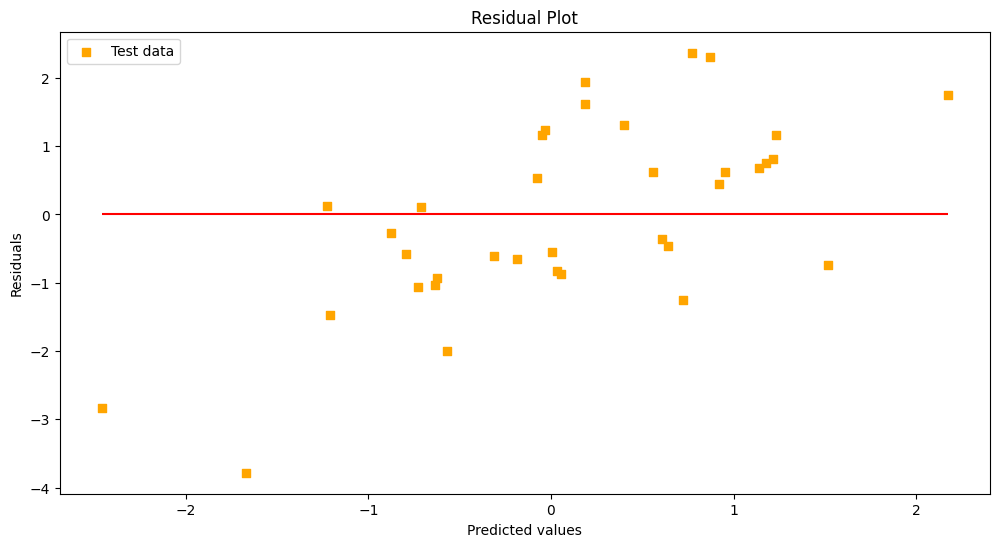

In [82]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_lstm_pred,(y_lstm_pred - lstm_y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_lstm_pred.min(), xmax=y_lstm_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

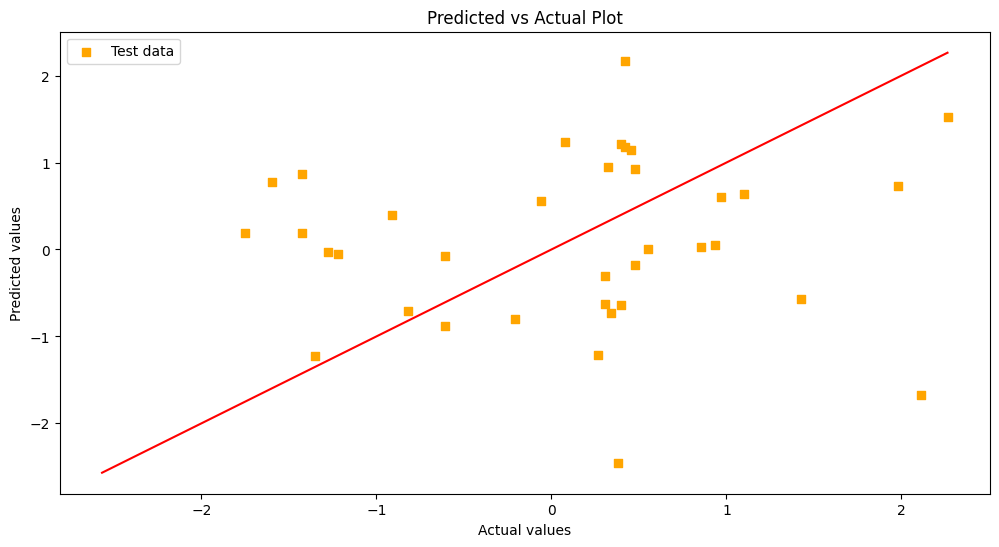

In [83]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(lstm_y_test, y_lstm_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Comaprison of Models**

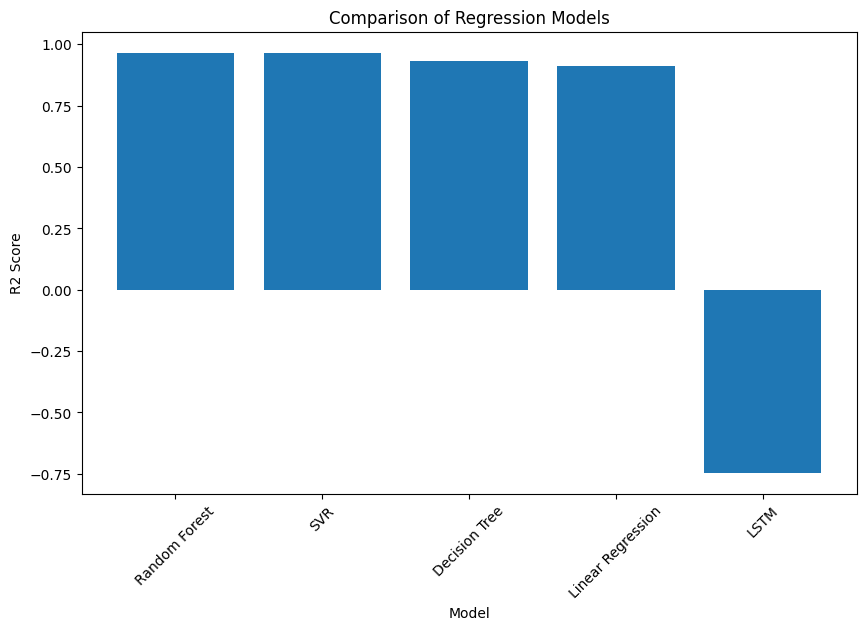

In [84]:

# Create a dictionary to store model names and their MSE values
models_r2 = {
    "Linear Regression": r2_lr,
    "Decision Tree": r2_dt,
    "Random Forest": r2_rf,
    "LSTM" : lstm_r2,
    "SVR": r2_svr
}

# Sort models by descending order of accuracy
sorted_models_r2 = dict(sorted(models_r2.items(), key=lambda item: item[1],reverse = True))

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(sorted_models_r2.keys(), sorted_models_r2.values())
plt.title('Comparison of Regression Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()


## **NEW PREDICTIONS WITH RANDOM FORESR REGRESSOR**





**Testing for New Inputs**

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


In [87]:
import numpy as np

# Given inputs
#inputs = np.array([TV, Radio, NewsPaper])
inputs = np.array([155,50,85])


In [88]:
new_inputs = scalerx.transform(inputs.reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Prediction**

In [89]:
new_pred = random_model.predict(new_inputs).reshape(-1,1)

In [90]:
n_pred = scalery.inverse_transform(new_pred)

In [93]:
print("Sales Prediction : ", n_pred[0][0] )

Sales Prediction :  21.153
